<a href="https://colab.research.google.com/github/lasyaistla/Emotion-analyzer/blob/main/video_emotions_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python pydub transformers openai-whisper librosa tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 29.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 841.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB

In [2]:
from google.colab import files

uploaded = files.upload()


Saving different  eotion tones video-VEED.mp4 to different  eotion tones video-VEED.mp4


Device set to use cpu
/usr/local/lib/python3.11/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_location

Extracting audio from video...
Transcribing audio to text...


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



#### Transcribed Text:
 Oh my god, I can't believe it is the best news ever and I've been fading for this moment so long. I don't know, this just seems so hard lately again to really check out this feeling of sadness. I am so fed up with this. How can this be so inconsiderate and they don't care about anyone else's feelings? Wait, what? No way you're telling me that's happening right now. Same.

#### Detected Emotion:
**Emotion:** sadness
**Confidence:** 0.54


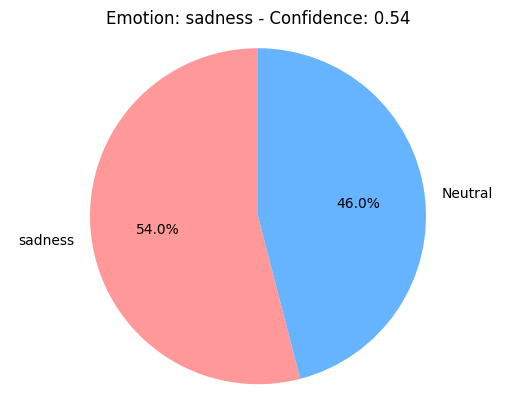

In [4]:
import cv2
import numpy as np
import os
import pydub
from transformers import pipeline
import whisper
from pydub import AudioSegment
import matplotlib.pyplot as plt

# Initialize emotion detection pipeline (Hugging Face model)
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Load Whisper model for speech-to-text transcription
whisper_model = whisper.load_model("base")

# Function to extract audio from video
def extract_audio_from_video(video_path, audio_path):
    # Open video file
    video_capture = cv2.VideoCapture(video_path)
    # Extract frames and audio
    success, frame = video_capture.read()

    # Save audio (temporary method using pydub)
    audio_segment = AudioSegment.from_file(video_path)
    audio_segment.export(audio_path, format="wav")

    video_capture.release()

# Function to transcribe audio to text using Whisper
def transcribe_audio_to_text(audio_path):
    result = whisper_model.transcribe(audio_path)
    return result['text']

# Function to detect emotion from text
def detect_emotion(text):
    result = emotion_classifier(text)
    return result[0]['label'], result[0]['score']

# Function to create a pretty visualization of results
def visualize_emotion(emotion, score):
    # Create a pie chart to visualize the emotion with confidence
    labels = [emotion, "Neutral"]
    sizes = [score * 100, (1 - score) * 100]
    colors = ['#ff9999','#66b3ff']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f"Emotion: {emotion} - Confidence: {score:.2f}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Main function to process video
def process_video(video_path):
    audio_path = "temp_audio.wav"

    # Extract audio from the video file
    print("Extracting audio from video...")
    extract_audio_from_video(video_path, audio_path)

    # Transcribe the extracted audio to text
    print("Transcribing audio to text...")
    text = transcribe_audio_to_text(audio_path)

    # Detect emotion from the transcribed text
    print(f"\n#### Transcribed Text:\n{text}\n")
    emotion, score = detect_emotion(text)

    # Display results in a pretty format
    print(f"#### Detected Emotion:")
    print(f"**Emotion:** {emotion}")
    print(f"**Confidence:** {score:.2f}")

    # Show the visualization for the emotion detected
    visualize_emotion(emotion, score)

# Upload video file path (change this if you want to specify a particular file)
video_path = list(uploaded.keys())[0]  # Assuming only one video was uploaded
process_video(video_path)

